In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Use matplotlib inline to display plots directly in the notebook
%matplotlib inline

In [66]:
import warnings

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
# Load data from a CSV file into a DataFrame
df = pd.read_csv(r'C:\Users\diksh\OneDrive\Desktop\Bank Customer Churn Prediction.csv')

In [5]:
df.shape

(10000, 13)

In [6]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,ChurnStatus
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Churned
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,NotChurned
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Churned
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,NotChurned
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,NotChurned


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
 12  ChurnStatus       10000 non-null  object 
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [8]:
df[['credit_score','age','balance','credit_card', 'estimated_salary']].describe()

,credit_score,age,balance,credit_card,estimated_salary
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,650.528800,38.921800,76485.889288,0.70550,100090.239881
std,96.653299,10.487806,62397.405202,0.45584,57510.492818
min,350.000000,18.000000,0.000000,0.00000,11.580000
25%,584.000000,32.000000,0.000000,0.00000,51002.110000
50%,652.000000,37.000000,97198.540000,1.00000,100193.915000
75%,718.000000,44.000000,127644.240000,1.00000,149388.247500
max,850.000000,92.000000,250898.090000,1.00000,199992.480000


In [9]:
# Get the column names
column_names = df.columns.tolist()

print("Column Names:")
print(column_names)

Column Names:
['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary', 'churn', 'ChurnStatus']


In [10]:
#  Adding a new column to the DataFrame...

In [11]:
# Age Groups

In [12]:
# Define age bins and labels
age_bins = [0, 20, 30, 40, 50, 60, 70, 92]
age_labels = ['<20', '21-30', '31-40', '41-50', '51-60', '61-70', '>70']

# Add a new column based on age bins
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

In [13]:
# Account Balance Groups

In [14]:
# Define balance bins and labels
balance_bins = [0, 1000, 10000, 100000, 200000, float('inf')] #Use float to use all values above 200k
balance_labels = ['<1k', '1k-10k', '10k-100k', '100k-200k', '>200k']

# Add a new column based on balance bins
df['balance_group'] = pd.cut(df['balance'], bins=balance_bins, labels=balance_labels, right=False)

In [15]:
# Credit Card Score Group

In [102]:
# Define score bins and labels
score_bins = [0, 400, 500, 600, 700, 800, 900] 
score_labels = ['<=400', '401-500', '501-600','601-700', '701-800', '>800']

# Add a new column based on score bins
df['score_group'] = pd.cut(df['credit_score'], bins=score_bins, labels=score_labels, right=False)

In [17]:
# Membership Status

In [18]:
# Map 0 and 1 to 'inactive' and 'active', respectively
df['Active_member_status'] = df['active_member'].map({0: 'Inactive', 1: 'Active'})

In [19]:
# Credit Card Status

In [20]:
# Map 0 and 1 to 'no credit card' and 'has credit card', respectively
df['Credit_card_status'] = df['credit_card'].map({0: 'No credit card', 1: 'Has credit card'})

In [103]:
# Get the column names
column_names = df.columns.tolist()

print("Column Names:")
print(column_names)

Column Names:
['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary', 'churn', 'ChurnStatus', 'age_group', 'balance_group', 'score_group', 'Active_member_status', 'Credit_card_status', 'cc_score_group']


In [22]:
## Evaluating Performance Metrics


In [23]:
# Finding total number of customers
total_customers = len(df['customer_id'].unique())
print("Total number of customers:", total_customers)

Total number of customers: 10000


In [24]:
# Finding total lost customers (churned)
lost_customers = df[df['ChurnStatus'] == 'Churned']
# Calculate the total number of lost customers
total_lost_customers = len(lost_customers['customer_id'].unique())
print("Total number of lost customers:", total_lost_customers)

Total number of lost customers: 2037


In [25]:
# Calculate the churn rate i.e lost customer rate
churn_rate = (total_lost_customers / total_customers) * 100
formatted_churn_rate = "{:.2f}".format(churn_rate)
print("Churn rate:", formatted_churn_rate, "%")

Churn rate: 20.37 %


In [26]:
# Finding total customer & Lost customer by gender
# Total customer by gender
total_customers_by_gender = df.groupby('gender').size()

# Total lost customer by gender
lost_customers_by_gender = lost_customers.groupby('gender').size()

# Display the results
print("Total customers by gender:")
print(total_customers_by_gender)

print("\nTotal lost customers by gender:")
print(lost_customers_by_gender)

Total customers by gender:
gender
Female    4543
Male      5457
dtype: int64

Total lost customers by gender:
gender
Female    1139
Male       898
dtype: int64


In [34]:
# Finding total customer & Lost customer by activity
# Total customers by activity status
total_customers_by_activity = df.groupby(['Active_member_status','gender']).size()

# Total lost customer by activity status
lost_customers_by_activity = lost_customers.groupby(['Active_member_status','gender']).size()

# Display the results
print("Total customers by activity status:")
print(total_customers_by_activity)

print("\nTotal lost customers by  activity status:")
print(lost_customers_by_activity)

Total customers by activity status:
Active_member_status  gender
Active                Female    2284
                      Male      2867
Inactive              Female    2259
                      Male      2590
dtype: int64

Total lost customers by  activity status:
Active_member_status  gender
Active                Female    414
                      Male      321
Inactive              Female    725
                      Male      577
dtype: int64


In [48]:
# Finding total customer & Lost customer by credit card status and also display the total regardless of the gender
# Total customers by credit card status and gender
total_customers_by_cc_status_gender = df.groupby(['Credit_card_status', 'gender']).size()

# Total lost customers by credit card status and gender
lost_customers_by_cc_status_gender = lost_customers.groupby(['Credit_card_status', 'gender']).size()

# Append total count for each credit card status
for cc_status in total_customers_by_cc_status.index:
    total_customers_by_cc_status_gender.loc[(cc_status, 'Total')] = total_customers_by_cc_status_gender.loc[(cc_status)].sum()
    lost_customers_by_cc_status_gender.loc[(cc_status, 'Total')] = lost_customers_by_cc_status_gender.loc[(cc_status)].sum()

# Display the results
print("Total customers by credit card status and gender:")
print(total_customers_by_cc_status_gender)

print("\nTotal lost customers by credit card status and gender:")
print(lost_customers_by_cc_status_gender)


Total customers by credit card status and gender:
Credit_card_status  gender
Has credit card     Female    3192
                    Male      3863
No credit card      Female    1351
                    Male      1594
Has credit card     Total     7055
No credit card      Total     2945
dtype: int64

Total lost customers by credit card status and gender:
Credit_card_status  gender
Has credit card     Female     795
                    Male       629
No credit card      Female     344
                    Male       269
Has credit card     Total     1424
No credit card      Total      613
dtype: int64


In [50]:
# Total customers by age group
total_customers_by_age_group = df.groupby('age_group', observed=False).size()

# Filter DataFrame for lost customers
lost_customers = df[df['ChurnStatus'] == 'Churned']

# Total lost customers by age group
lost_customers_by_age_group = lost_customers.groupby('age_group', observed=False).size()

# Display the results
print("Total customers by age group:")
print(total_customers_by_age_group)

print("\nTotal lost customers by age group:")
print(lost_customers_by_age_group)


Total customers by age group:
age_group
<20        49
21-30    1592
31-40    4346
41-50    2618
51-60     869
61-70     375
>70       149
dtype: int64

Total lost customers by age group:
age_group
<20        3
21-30    121
31-40    473
41-50    806
51-60    487
61-70    132
>70       15
dtype: int64


In [71]:
# Total customers by age group and gender
total_customers_by_age_group_gender = df.groupby(['age_group', 'gender'], observed=False).size()

# Filter DataFrame for lost customers
lost_customers = df[df['ChurnStatus'] == 'Churned']

# Total lost customers by age group and gender
lost_customers_by_age_group_gender = lost_customers.groupby(['age_group', 'gender'], observed=False).size()

# Display the results
print("Total customers by age group and gender:")
print(total_customers_by_age_group_gender)

print("\nTotal lost customers by age group and gender:")
print(lost_customers_by_age_group_gender)


Total customers by age group and gender:
age_group  gender
<20        Female      13
           Male        36
21-30      Female     737
           Male       855
31-40      Female    1884
           Male      2462
41-50      Female    1247
           Male      1371
51-60      Female     421
           Male       448
61-70      Female     165
           Male       210
>70        Female      76
           Male        73
dtype: int64

Total lost customers by age group and gender:
age_group  gender
<20        Female      1
           Male        2
21-30      Female     73
           Male       48
31-40      Female    268
           Male      205
41-50      Female    450
           Male      356
51-60      Female    265
           Male      222
61-70      Female     71
           Male       61
>70        Female     11
           Male        4
dtype: int64


In [72]:
# Total customers by balance group
total_customers_by_balance_group = df.groupby(['balance_group','gender'], observed=False).size()

# Filter DataFrame for lost customers
lost_customers = df[df['ChurnStatus'] == 'Churned']

# Total lost customers by balance group
lost_customers_by_balance_group = lost_customers.groupby(['balance_group','gender'], observed=False).size()

# Display the results
print("Total customers by balance group:")
print(total_customers_by_balance_group)

print("\nTotal lost customers by balance group:")
print(lost_customers_by_balance_group)


Total customers by balance group:
balance_group  gender
<1k            Female    1654
               Male      1963
1k-10k         Female       1
               Male         0
10k-100k       Female     740
               Male       843
100k-200k      Female    2132
               Male      2633
>200k          Female      16
               Male        18
dtype: int64

Total lost customers by balance group:
balance_group  gender
<1k            Female    290
               Male      210
1k-10k         Female      1
               Male        0
10k-100k       Female    195
               Male      130
100k-200k      Female    643
               Male      549
>200k          Female     10
               Male        9
dtype: int64


In [108]:
# Total customers by score group and gender
total_customers_by_score_group = df.groupby(['score_group', 'gender'], observed=False).size()

# Filter DataFrame for lost customers
lost_customers = df[df['ChurnStatus'] == 'Churned']

# Total lost customers by score group and gender
lost_customers_by_score_group = lost_customers.groupby(['score_group', 'gender'], observed=False).size()

# Display the results
print("Total customers by score group and gender:")
print(total_customers_by_score_group)

print("\nTotal lost customers by score group and gender:")
print(lost_customers_by_score_group)


Total customers by score group and gender:
score_group  gender
<=400        Female      11
             Male         8
401-500      Female     285
             Male       328
501-600      Female    1070
             Male      1332
601-700      Female    1743
             Male      2075
701-800      Female    1140
             Male      1353
>800         Female     294
             Male       361
dtype: int64

Total lost customers by score group and gender:
score_group  gender
<=400        Female     11
             Male        8
401-500      Female     73
             Male       58
501-600      Female    271
             Male      239
601-700      Female    429
             Male      324
701-800      Female    286
             Male      210
>800         Female     69
             Male       59
dtype: int64


In [58]:
# EDA Exploratory Data Analysis 

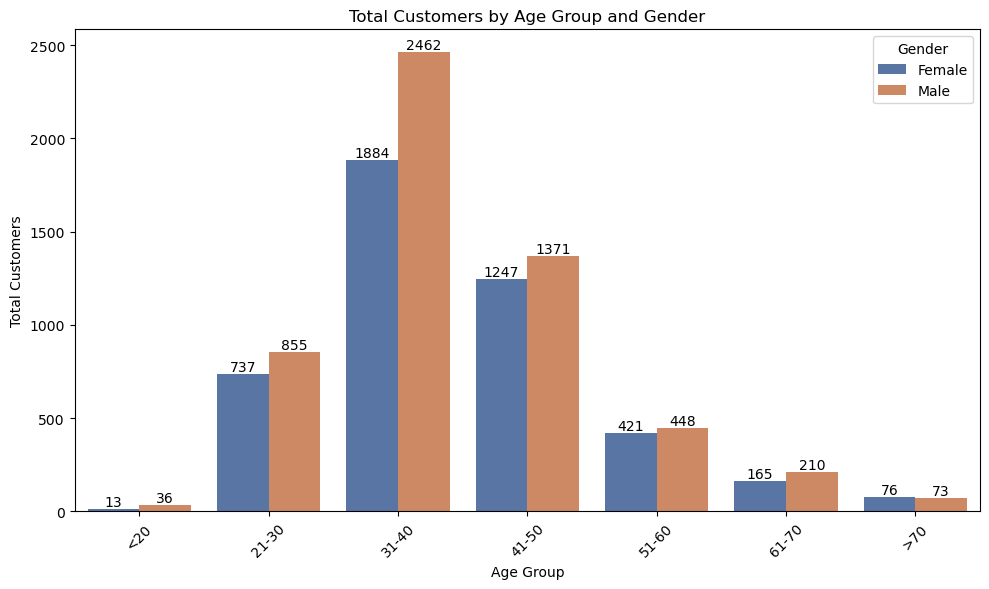

In [68]:
# Plot the graph with hue
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='age_group', hue='gender', palette='deep', dodge=True)

# Add simple labels to the bars
for p in ax.patches:
    height = p.get_height() if pd.notnull(p.get_height()) else 0  # Handle NaN heights
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Add title and labels
plt.title('Total Customers by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Total Customers')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


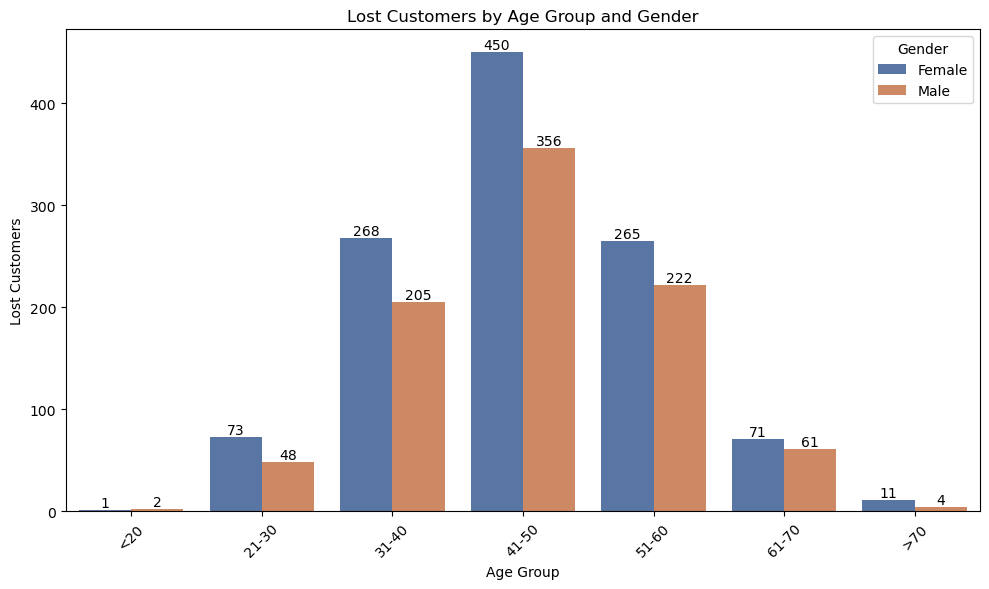

In [77]:
# Plot the graph with hue for lost customers
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=lost_customers, x='age_group', hue='gender', palette='deep', dodge=True)

# Add simple labels to the bars
for p in ax.patches:
    height = p.get_height() if pd.notnull(p.get_height()) else 0  # Handle NaN heights
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Add title and labels
plt.title('Lost Customers by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Lost Customers')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

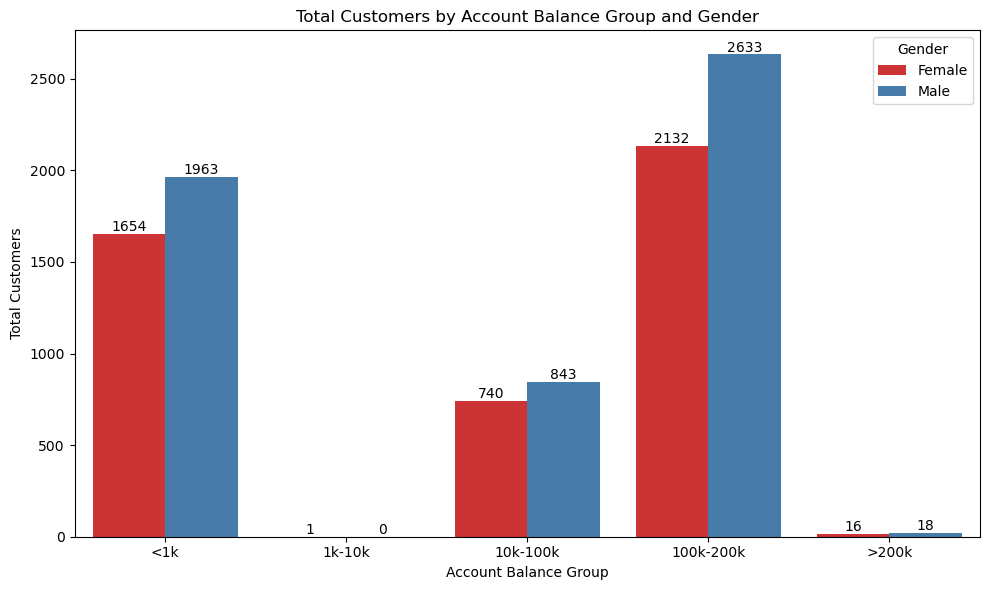

In [92]:
# Plot the graph with hue for total customers by account balance group
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='balance_group', hue='gender', palette='Set1', dodge=True)

# Add simple labels to the bars
for p in ax.patches:
    height = p.get_height() if pd.notnull(p.get_height()) else 0  # Handle NaN heights
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Add title and labels
plt.title('Total Customers by Account Balance Group and Gender')
plt.xlabel('Account Balance Group')
plt.ylabel('Total Customers')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

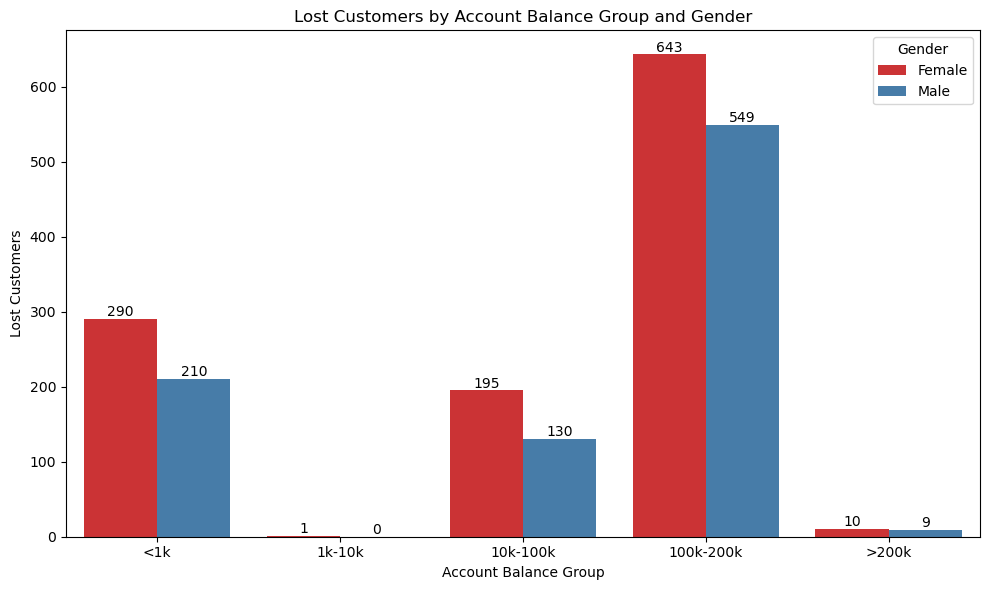

In [91]:
# Plot the graph with hue for lost customers by account balance group
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=lost_customers, x='balance_group', hue='gender', palette='Set1', dodge=True)

# Add simple labels to the bars
for p in ax.patches:
    height = p.get_height() if pd.notnull(p.get_height()) else 0  # Handle NaN heights
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Add title and labels
plt.title('Lost Customers by Account Balance Group and Gender')
plt.xlabel('Account Balance Group')
plt.ylabel('Lost Customers')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

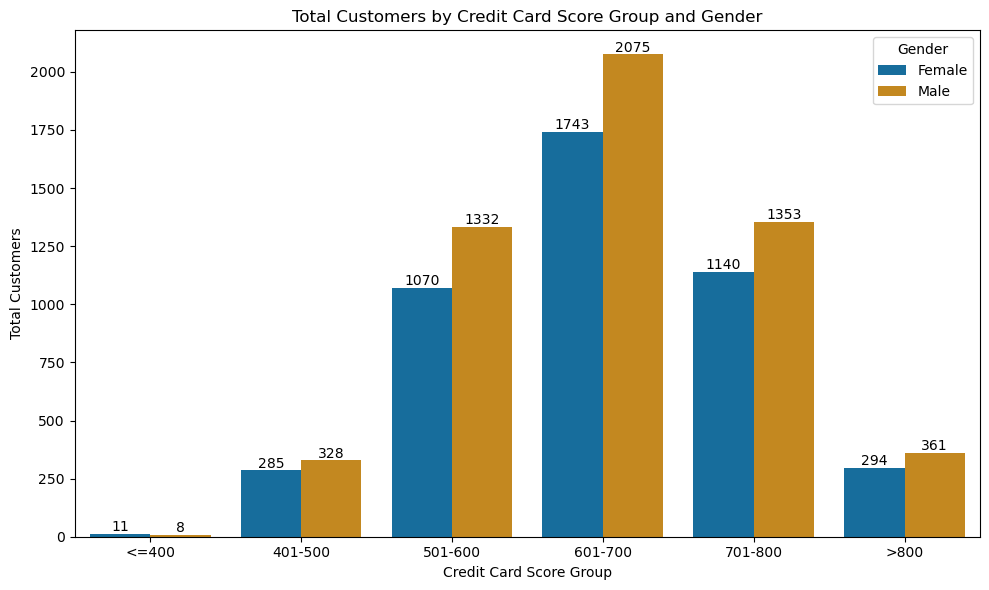

In [90]:
# Plot the graph with hue for total customers by credit card score group
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='score_group', hue='gender', palette='colorblind', dodge=True)

# Add simple labels to the bars
for p in ax.patches:
    height = p.get_height() if pd.notnull(p.get_height()) else 0  # Handle NaN heights
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Add title and labels
plt.title('Total Customers by Credit Card Score Group and Gender')
plt.xlabel('Credit Card Score Group')
plt.ylabel('Total Customers')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

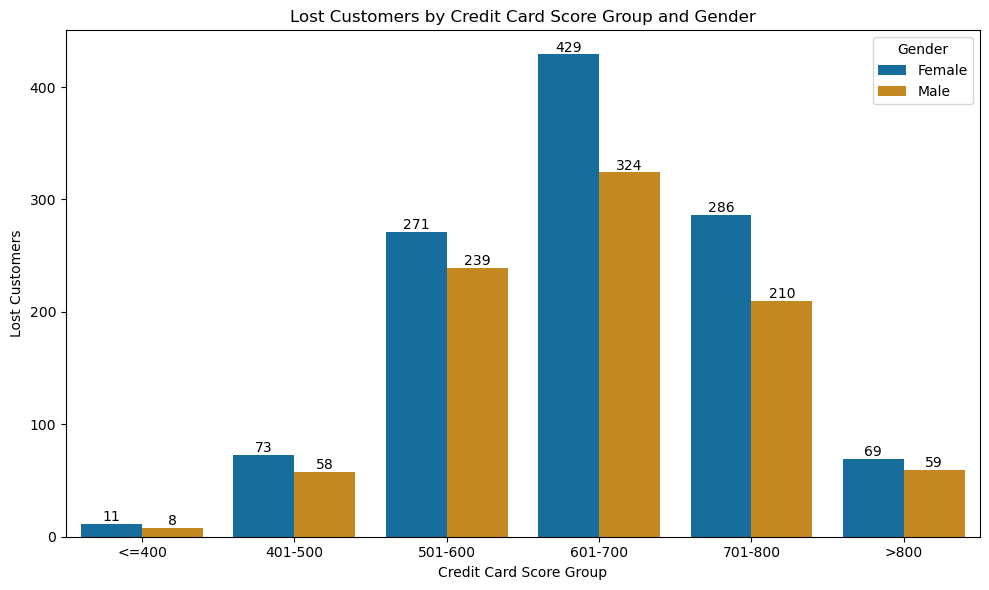

In [89]:
# Plot the graph with hue for lost customers by credit card score group
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=lost_customers, x='score_group', hue='gender', palette='colorblind', dodge=True)

# Add simple labels to the bars
for p in ax.patches:
    height = p.get_height() if pd.notnull(p.get_height()) else 0  # Handle NaN heights
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Add title and labels
plt.title('Lost Customers by Credit Card Score Group and Gender')
plt.xlabel('Credit Card Score Group')
plt.ylabel('Lost Customers')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


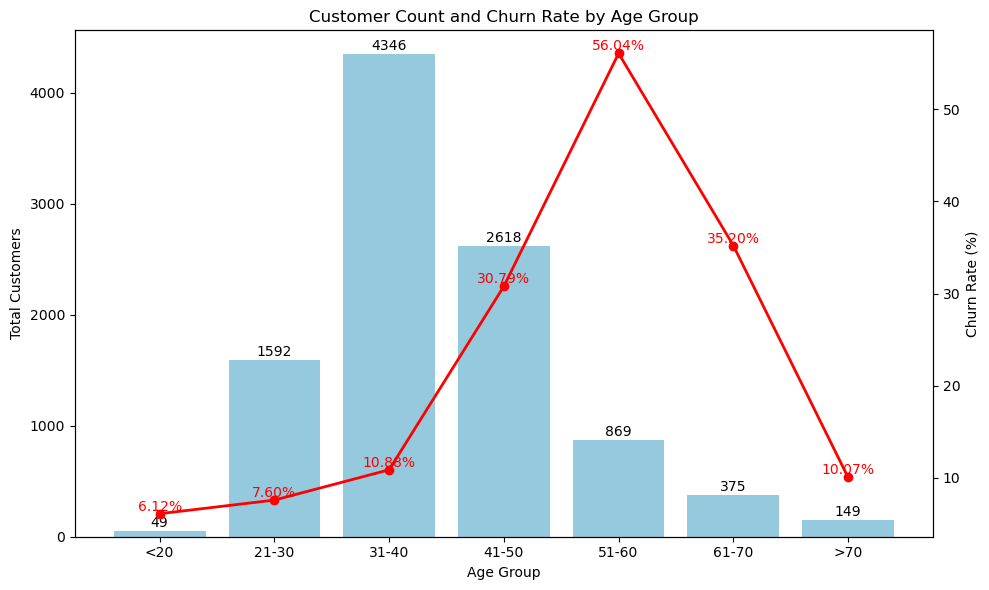

In [96]:
# Calculate churn rate by age group
churn_rate_by_age_group = df.groupby('age_group')['ChurnStatus'].apply(lambda x: (x == 'Churned').sum() / len(x) * 100)

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for total customers
sns.barplot(x=total_customers_by_age_group.index, y=total_customers_by_age_group.values, ax=ax1, color='skyblue')
ax1.set_ylabel('Total Customers', color='black')
ax1.set_xlabel('Age Group')
ax1.tick_params(axis='y', labelcolor='black')

# Add labels to the bars
for i, v in enumerate(total_customers_by_age_group.values):
    ax1.text(i, v + 10, str(v), ha='center', va='bottom', color='black')
    
# Twin the axis for churn rate
ax2 = ax1.twinx()
ax2.plot(churn_rate_by_age_group.index, churn_rate_by_age_group.values, marker='o', color='red', linewidth=2)
ax2.set_ylabel('Churn Rate (%)', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Add labels to the line chart
for i, v in enumerate(churn_rate_by_age_group.values):
    ax2.text(i, v, f'{v:.2f}%', ha='center', va='bottom', color='red')
    
# Title and labels
plt.title('Customer Count and Churn Rate by Age Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


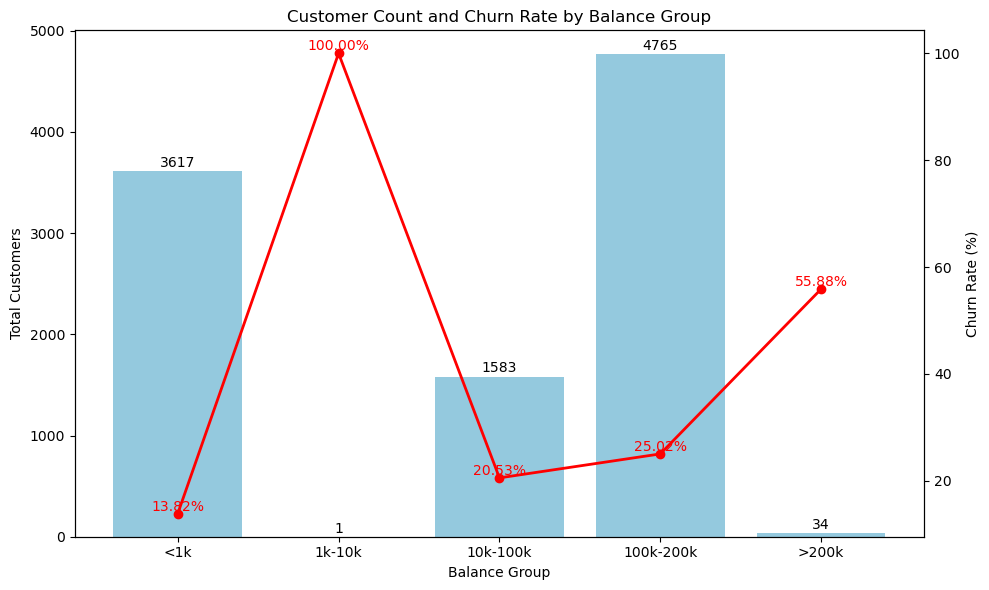

In [128]:
# Calculate churn rate by balance group
churn_rate_by_balance_group = (lost_customers.groupby('balance_group').size() / total_customers_by_balance_group) * 100

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for total customers
sns.barplot(x=total_customers_by_balance_group.index, y=total_customers_by_balance_group.values, ax=ax1, color='skyblue')
ax1.set_ylabel('Total Customers', color='black')
ax1.set_xlabel('Balance Group')
ax1.tick_params(axis='y', labelcolor='black')

# Add labels to the bars
for i, v in enumerate(total_customers_by_balance_group.values):
    ax1.text(i, v + 10, str(v), ha='center', va='bottom', color='black')

# Twin the axis for churn rate
ax2 = ax1.twinx()
ax2.plot(churn_rate_by_balance_group.index, churn_rate_by_balance_group.values, marker='o', color='red', linewidth=2)
ax2.set_ylabel('Churn Rate (%)', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Add labels to the line chart
for i, v in enumerate(churn_rate_by_balance_group.values):
    ax2.text(i, v, f'{v:.2f}%', ha='center', va='bottom', color='red')

# Title and labels
plt.title('Customer Count and Churn Rate by Balance Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


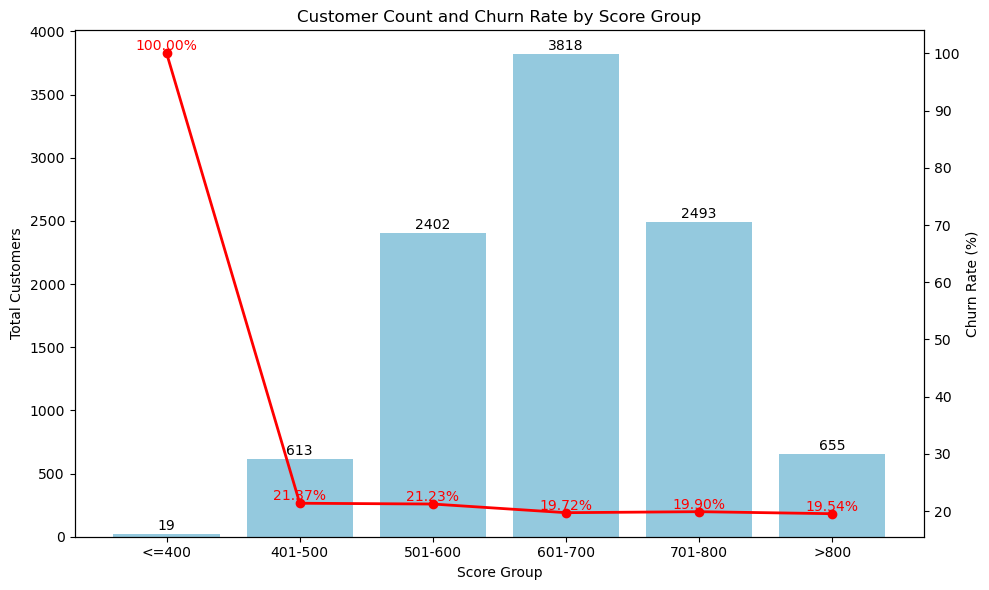

In [115]:
# Calculate churn rate by score group
churn_rate_by_score_group = (lost_customers.groupby('score_group').size() / total_customers_by_score_group) * 100

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for total customers
sns.barplot(x=total_customers_by_score_group.index, y=total_customers_by_score_group.values, ax=ax1, color='skyblue')
ax1.set_ylabel('Total Customers', color='black')
ax1.set_xlabel('Score Group')
ax1.tick_params(axis='y', labelcolor='black')

# Add labels to the bars
for i, v in enumerate(total_customers_by_score_group.values):
    ax1.text(i, v + 10, str(v), ha='center', va='bottom', color='black')

# Twin the axis for churn rate
ax2 = ax1.twinx()
ax2.plot(churn_rate_by_score_group.index, churn_rate_by_score_group.values, marker='o', color='red', linewidth=2)
ax2.set_ylabel('Churn Rate (%)', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Add labels to the line chart
for i, v in enumerate(churn_rate_by_score_group.values):
    ax2.text(i, v, f'{v:.2f}%', ha='center', va='bottom', color='red')

# Title and labels
plt.title('Customer Count and Churn Rate by Score Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


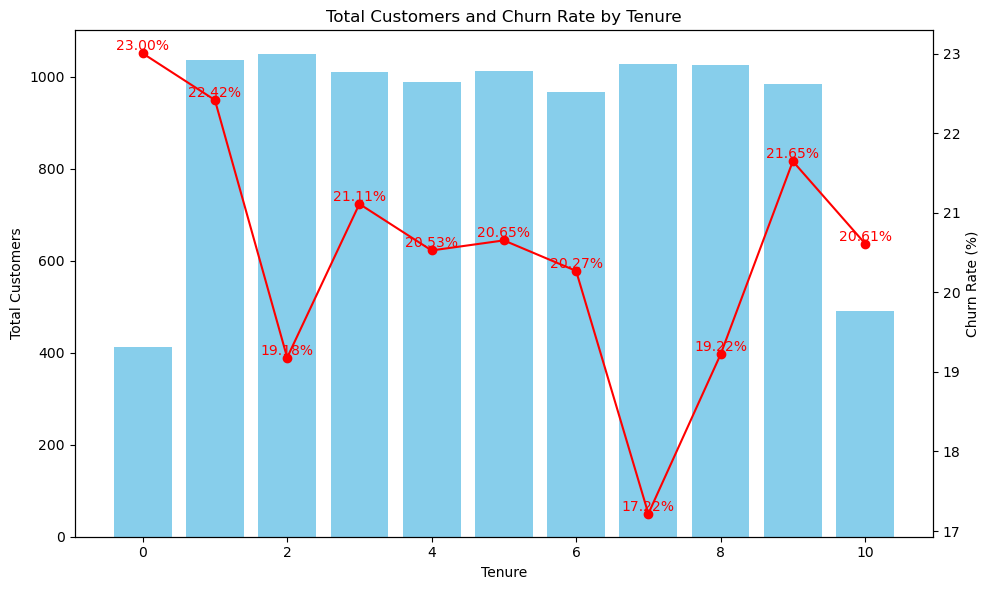

In [129]:
# Calculate total customers by tenure
total_customers_by_tenure = df.groupby('tenure').size()

# Calculate churn rate by tenure
churn_rate_by_tenure = (df[df['ChurnStatus'] == 'Churned'].groupby('tenure').size() / total_customers_by_tenure) * 100

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for total customers
plt.bar(total_customers_by_tenure.index, total_customers_by_tenure.values, color='skyblue', label='Total Customers')
ax1.set_ylabel('Total Customers', color='black')
ax1.set_xlabel('Tenure')

# Twin the axis for churn rate
ax2 = ax1.twinx()
ax2.plot(churn_rate_by_tenure.index, churn_rate_by_tenure.values, marker='o', color='red', label='Churn Rate (%)')
ax2.set_ylabel('Churn Rate (%)', color='black')

# Add labels to the line chart
for i, v in zip(churn_rate_by_tenure.index, churn_rate_by_tenure.values):
    ax2.text(i, v, f'{v:.2f}%', ha='center', va='bottom', color='red')

# Title and labels
plt.title('Total Customers and Churn Rate by Tenure')
plt.tight_layout()
plt.show()
